In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\user\Desktop\Laptop_Price_Prediction_Model_Nepal\NP Laptop Price.csv')


In [4]:
df.head()

,Brand,Model,Processor,RAM,Storage SSD,Size,Graphics_card,Price
0,Dell,Vostro 3520,Intel Core i3,16,512,15.6,No,54999
1,Dell,Vostro 3520,Intel Core i5,16,512,15.6,No,68999
2,Dell,Vostro 3520,Intel Core i5,16,512,15.6,No,69499
3,Lenovo,V15,Intel Celeron,4,256,15.6,No,33999
4,Dell,Latitude E5470,Intel Core i5,8,256,14.0,No,65000


In [5]:
df.shape

(70, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          70 non-null     object 
 1   Model          70 non-null     object 
 2   Processor      70 non-null     object 
 3   RAM            70 non-null     int64  
 4   Storage SSD    70 non-null     int64  
 5   Size           70 non-null     float64
 6   Graphics_card  70 non-null     object 
 7   Price          70 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ KB


In [7]:
df.isnull().sum()

Brand            0
Model            0
Processor        0
RAM              0
Storage SSD      0
Size             0
Graphics_card    0
Price            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,RAM,Storage SSD,Size,Price
count,70.000000,70.000000,70.000000,70.000000
mean,9.942857,446.171429,15.021429,76294.928571
std,4.071412,206.443098,0.806117,34973.225632
min,4.000000,128.000000,13.300000,32999.000000
25%,8.000000,256.000000,14.000000,51999.250000
50%,8.000000,512.000000,15.600000,69744.500000
75%,16.000000,512.000000,15.600000,94249.000000
max,16.000000,1024.000000,16.000000,205000.000000


In [10]:
df['Graphics_card'] = df['Graphics_card'].map({'No': 0, 'Yes': 1})


In [11]:
df['Graphics_card'].value_counts()

Graphics_card
0    57
1    13
Name: count, dtype: int64

In [12]:
df['Brand'].value_counts()

Brand
Lenovo    18
Acer      17
Dell      16
Asus       9
HP         5
Chuwi      2
MSI        1
MI         1
Honor      1
Name: count, dtype: int64

In [13]:
brands_to_remove = ['MSI', 'MI', 'Honor']

# Filter out the rows
df = df[~df['Brand'].isin(brands_to_remove)]

In [14]:
df['Brand'].value_counts()

Brand
Lenovo    18
Acer      17
Dell      16
Asus       9
HP         5
Chuwi      2
Name: count, dtype: int64

In [15]:
df['Model'].value_counts()

Model
Vostro 3520               10
Aspire 5                   7
V15                        3
Victus                     2
IdeaPad Slim 3             2
ZenBook                    2
V14                        2
IP Slim 3                  2
Vivobook                   2
LOQ 15                     2
Ideapad Slim 3             2
Vivobook Go                2
Legion Slim 5              1
Ideapad                    1
Latitude E5400             1
Swift Go                   1
Latitude 5480              1
Nitro V15                  1
Zephyrus G15               1
GemiBook X                 1
HeroBook Plus              1
Travelmate P2              1
Nitro V                    1
Latitude E7490             1
Nitro 5                    1
Swift 3                    1
Swift Go 14                1
Latitude E7390             1
Notebook 250 G9            1
LOQ                        1
Expertbook                 1
15 fc0093dx                1
Latitude E5300             1
VivoBook                   1
IdeaPad 

In [16]:
# Combining similar models
model_combinations = {
    'IdeaPad Slim 3': ['Ideapad Slim 3', 'IP Slim 3'],
    'Vivobook': ['Vivobook Go', 'VivoBook'],
}

# Function to replace values based on the model_combinations dictionary
def combine_models(row, combinations):
    for key, values in combinations.items():
        if row in values:
            return key
    return row

df['Model'] = df['Model'].apply(combine_models, args=(model_combinations,))

In [17]:
df['Model'].value_counts()

Model
Vostro 3520               10
Aspire 5                   7
IdeaPad Slim 3             6
Vivobook                   5
V15                        3
LOQ 15                     2
Victus                     2
ZenBook                    2
V14                        2
Latitude 5480              1
Nitro V                    1
GemiBook X                 1
Zephyrus G15               1
Nitro V15                  1
Latitude E5400             1
Swift 3                    1
Ideapad                    1
Legion Slim 5              1
Swift Go                   1
HeroBook Plus              1
Travelmate P2              1
Latitude E7490             1
LOQ                        1
Swift Go 14                1
Latitude E7390             1
Nitro 5                    1
Notebook 250 G9            1
Expertbook                 1
15 fc0093dx                1
Latitude E5300             1
IdeaPad 1                  1
Predator Helios 300        1
Predator Triton 300 SE     1
Aspire 3                   1
Ideapad 

In [18]:
models_to_combine = [
    'V15', 'LOQ 15', 'Victus', 'ZenBook', 'V14', 'Latitude 5480', 'Nitro V',
    'GemiBook X', 'Zephyrus G15', 'Nitro V15', 'Latitude E5400', 'Swift 3',
    'Ideapad', 'Legion Slim 5', 'Swift Go', 'HeroBook Plus', 'Travelmate P2',
    'Latitude E7490', 'LOQ', 'Swift Go 14', 'Latitude E7390', 'Nitro 5',
    'Notebook 250 G9', 'Expertbook', '15 fc0093dx', 'Latitude E5300', 'IdeaPad 1',
    'Predator Helios 300', 'Predator Triton 300 SE', 'Aspire 3', 'Ideapad 1',
    'Latitude E5470', 'Envy x360', 'LOQ '
]

# Set 'Other' for specific models
df['Model'] = df['Model'].apply(lambda x: 'Other' if x in models_to_combine else x)

In [19]:
df['Model'].value_counts()

Model
Other             39
Vostro 3520       10
Aspire 5           7
IdeaPad Slim 3     6
Vivobook           5
Name: count, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt



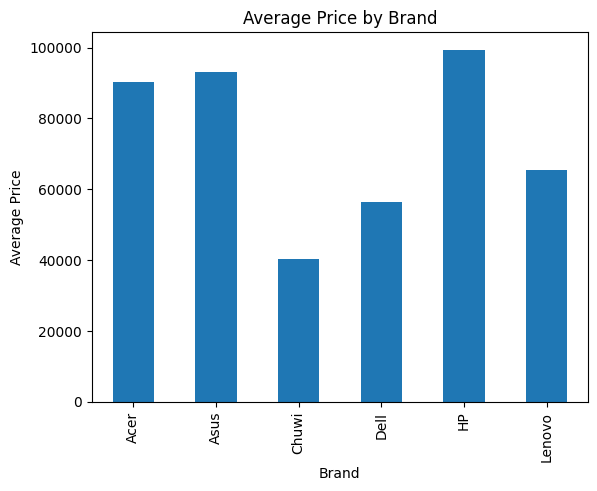

In [21]:
df.groupby('Brand')['Price'].mean().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.show()

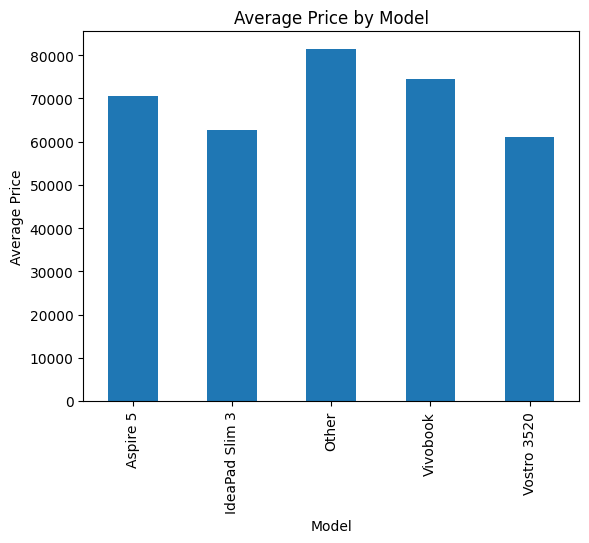

In [22]:
df.groupby('Model')['Price'].mean().plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.title('Average Price by Model')
plt.show()

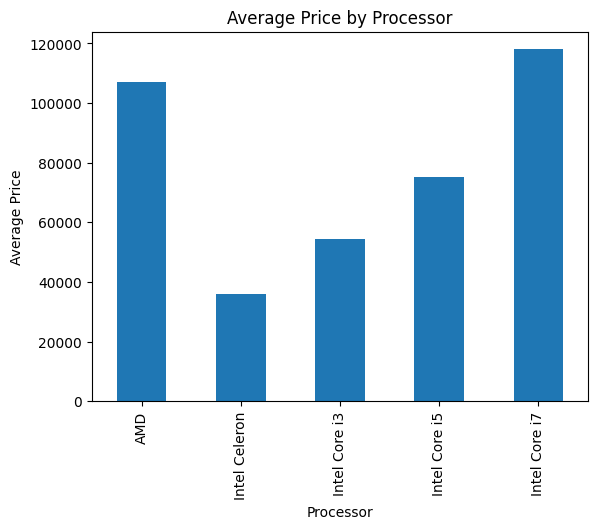

In [23]:
df.groupby('Processor')['Price'].mean().plot(kind='bar')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.title('Average Price by Processor')
plt.show()

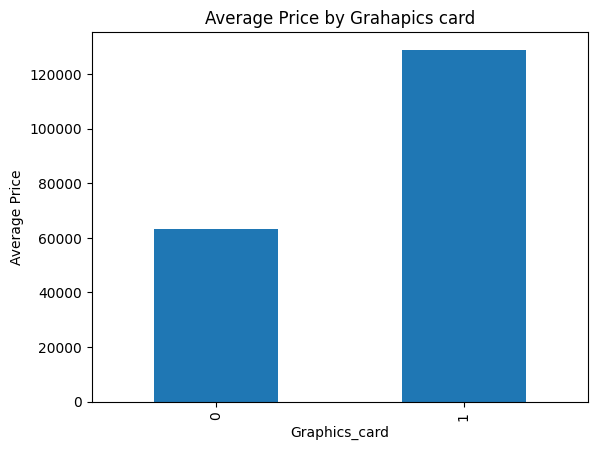

In [24]:
df.groupby('Graphics_card')['Price'].mean().plot(kind='bar')
plt.xlabel('Graphics_card')
plt.ylabel('Average Price')
plt.title('Average Price by Grahapics card')
plt.show()

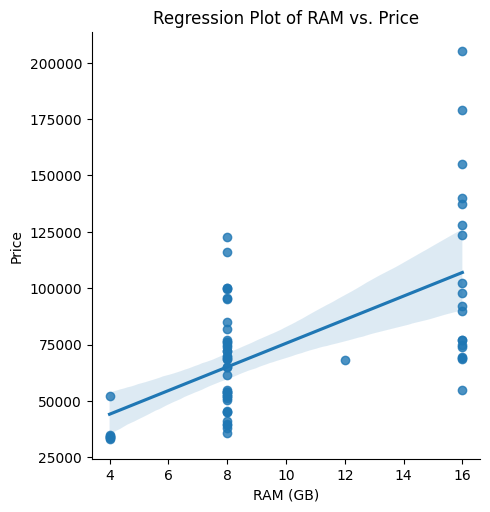

In [25]:
sns.lmplot(x='RAM', y='Price', data=df)
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('Regression Plot of RAM vs. Price')
plt.show()

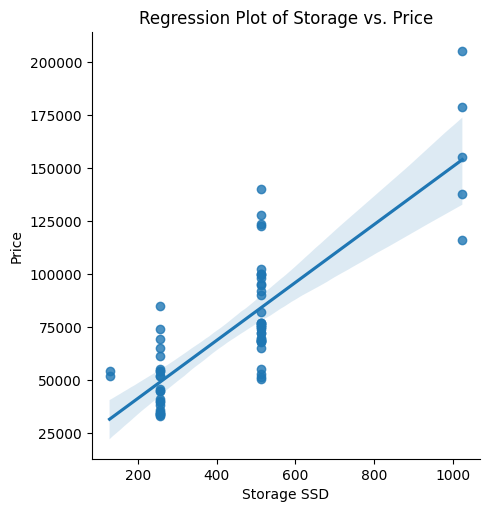

In [26]:
sns.lmplot(x='Storage SSD', y='Price', data=df)
plt.xlabel('Storage SSD')
plt.ylabel('Price')
plt.title('Regression Plot of Storage vs. Price')
plt.show()

In [27]:
df.describe()

,RAM,Storage SSD,Size,Graphics_card,Price
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,9.910448,447.044776,15.043284,0.179104,75084.283582
std,4.081486,209.465802,0.801367,0.386334,35094.612837
min,4.000000,128.000000,13.300000,0.000000,32999.000000
25%,8.000000,256.000000,14.000000,0.000000,51994.500000
50%,8.000000,512.000000,15.600000,0.000000,69444.000000
75%,16.000000,512.000000,15.600000,0.000000,90994.500000
max,16.000000,1024.000000,16.000000,1.000000,205000.000000


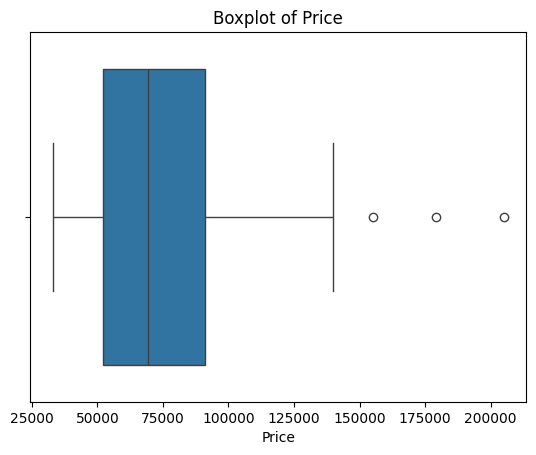

In [28]:
sns.boxplot(x=df['Price'])
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.show()

In [29]:
df=df[df['Price']<160000]

In [30]:
df = df[df['Price'] < 160000]


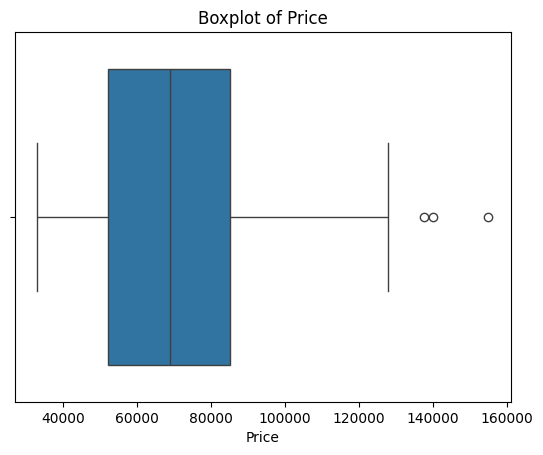

In [31]:
sns.boxplot(x=df['Price'])
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.show()

In [32]:
df['Price'].skew()

0.8706175182298874

In [33]:
df['Size'].skew()

-0.7307185083303878

In [34]:
df['Storage SSD'].skew()

1.1855913420293929

In [35]:
df['RAM'].skew()

0.6809039981332881

In [36]:
df['Storage SSD'] = np.log(df['Storage SSD'])

In [37]:
df = df.drop_duplicates()

In [38]:
df.reset_index(drop=True, inplace=True)


In [39]:
# Assuming df is your DataFrame
numeric_cols = ['RAM', 'Storage SSD', 'Size', 'Graphics_card', 'Price']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Display correlation matrix
print(corr_matrix)


                    RAM  Storage SSD      Size  Graphics_card     Price
RAM            1.000000     0.511395  0.125119       0.326755  0.580803
Storage SSD    0.511395     1.000000  0.123812       0.392777  0.708825
Size           0.125119     0.123812  1.000000       0.225351  0.033719
Graphics_card  0.326755     0.392777  0.225351       1.000000  0.667603
Price          0.580803     0.708825  0.033719       0.667603  1.000000


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Categorical and numerical columns
cat_cols = ['Brand', 'Model', 'Processor']
num_cols = ['RAM', 'Storage SSD', 'Size', 'Graphics_card']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Model selection
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR())
]

results = {}

# Fit and evaluate models
for name, model in models:
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R2 Score': r2, 'MAE': mae}

# Display results
for model, result in results.items():
    print(f"{model}: R2 Score = {result['R2 Score']:.4f}, MAE = {result['MAE']:.2f}")


Linear Regression: R2 Score = 0.5616, MAE = 8383.20
Random Forest: R2 Score = 0.4901, MAE = 8292.97
Gradient Boosting: R2 Score = 0.5485, MAE = 9291.66
KNN: R2 Score = 0.6183, MAE = 8299.18
SVR: R2 Score = 0.0001, MAE = 15465.52


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import pickle



# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Define RandomForestRegressor model
rf_model = RandomForestRegressor()

# Create pipeline including preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate R2 score using cross-validation
r2_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

# Calculate MAE using cross-validation
mae_scores = -cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Print mean R2 score and mean MAE
print(f"Mean R2 Score (Random Forest with 10-fold CV): {np.mean(r2_scores):.4f}")
print(f"Mean MAE (Random Forest with 10-fold CV): {np.mean(mae_scores):.2f}")

# Fit the RandomForestRegressor on the entire training set
pipeline.fit(X_train, y_train)

# Save the RandomForestRegressor model to a pickle file
with open('random_forest_cv.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("RandomForestRegressor model with 10-fold CV saved to 'random_forest_cv.pkl'")


Mean R2 Score (Random Forest with 10-fold CV): 0.6675
Mean MAE (Random Forest with 10-fold CV): 7534.36
RandomForestRegressor model with 10-fold CV saved to 'random_forest_cv.pkl'
